# 8 텍스트 분석

## 8-1 텍스트 분석 이해

### 텍스트 분석 수행 프로세스

### 파이썬 기반의 NLP, 텍스트 분석 패키지

## 8-2 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

### 클렌징

### 텍스트 토큰환

#### 문장 토큰화

In [ ]:
from nltk import sent_tokenize

import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


#### 단어 토큰화

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us , here even in this room."
words = word_tokenize(sentence)
print(type(words) , len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [ ]:
from nltk import word_tokenize , sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    #분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]

    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens) , len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### 스톱 워드 제거

In [ ]:
import nltk
nltk.download( 'stopwords' )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print('영어 stop words 개수:' , len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환 합니다.
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working') , stemmer.stem('works') , stemmer.stem('worked') )
print(stemmer.stem('amusing') , stemmer.stem('amuses') , stemmer.stem('amused') )
print(stemmer.stem('happier') , stemmer.stem('happiest'))
print(stemmer.stem('fancier') , stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing' , 'v') , lemma.lemmatize('amuses' , 'v') , lemma.lemmatize('amuse' , 'v'))
print(lemma.lemmatize('happier' , 'a') , lemma.lemmatize('happiest' , 'a'))
print(lemma.lemmatize('fancier' , 'a') , lemma.lemmatize('fanciest' , 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
amuse amuse amuse
happy happy
fancy fancy


## 8-3 Bag of Words - BOW

### BOW 피처 벡터화

### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer

### BOW 벡터화를 위한 희소 행렬

### 희소 행렬 -COO 형식

In [ ]:
import numpy as np

dense = np.array( [ [3,0,1] , [0,2,0] ])

In [ ]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data , (row_pos , col_pos)))

In [ ]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 희소 행렬 - CSR 형식

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2 , (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CRS 형식으로 변환
sparse_csr = sparse.csr_matrix((data2 , col_pos , row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [ ]:
print(coo)
print('####')
print(csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
####
  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


## 8-4 텍스트 분류 실습 - 20 뉴스그룹 분류

### 텍스트 정규화

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all' , random_state = 156)

In [ ]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
import pandas as pd

print('target 클래스의 값과 분포도 \n' , pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset = 'train'으로 학습용 데이터만 추출, remove=('headers' , 'footers' , 'quetes')로 내용만 추출
train_news = fetch_20newsgroups(subset = 'train' , remove=('headers' , 'footers' , 'quetes') , random_state=156)
X_train = train_news.data 
y_train = train_news.target

# subset = 'test'으로 테스트 데이터만 추출, remove=('headers' , 'footers' , 'quetes')로 내용만 추출
test_news = fetch_20newsgroups(subset = 'test' , remove=('headers' , 'footers' , 'quetes') , random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0}, 테스트 데이터 크기{1}'.format(len(train_news.data) , len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기7532


### 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectoriztion으로 피처 백터화 변화 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용해 테스트 데이터를 피처 벡처화 변환 수행.
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CounterVectorizer Shape:' , X_train_cnt_vect.shape )

학습 데이터 텍스트의 CounterVectorizer Shape: (11314, 114751)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test , pred)))

CountVectorized Logistic Regression의 예측 정확도는 0.709


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from nltk.metrics.scores import accuracy
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test , pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.778


In [ ]:
# stop words 필터링을 추가하고 ngram을 기본 (1,1)에서 (1,2)로 변경해 피처 벡터화 적용.
tfidf_vect = TfidfVectorizer(stop_words='english' , ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Redgression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test , pred)))

TF-IDF Vectorized Logistic Redgression 의 예측 정확도는 0.796


In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C값 도출 츄닝 수행. CV는 3 폴드 세트로 설정.
params = { 'C' : [0.01 , 0.1 ,1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf , param_grid=params , cv=3 , scoring='accuracy' , verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)

# 최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가.
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test , pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.803


### 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tfidf_vect' , TfidfVectorizer(stop_words='english')),
                     ('lr_clf' , LogisticRegression(random_state=156))])

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect로 , LogisticRegression 객체를 lr_clf로 생성하는 Pipeline 생성.
pipeline = Pipeline([
                     ('tfidf_vect' , TfidfVectorizer(stop_words='english' , ngram_range=(1,2) , max_df=300),
                      'lr_clf' , LogisticRegression(c=10))
])

# 별도의 TfidfVectorizer 객체의 fit( ),transform( )과 LogisticRegression의 fit(), predict()가 
# 필요없음.
# pipeline의 fit( )과 predict( )만으로 한꺼번에 피처 벡터화와 ML 학습/예측이 가능.
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test , pred)))

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                     ('tfidf_vect' , TfidfVectorizer(stop_words = 'english')),
                     ('lr_clf' , LogisticRegression())
])

#Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될
#파라미터/하이퍼 파라미터 이름과 값을 설정.
prams = { 'tfidf_vect__ngram_range' : [(1,1) ,(1,2) , (1,3)],
         'tfidf_vect_max_df':[100,300,700],
         'lr_clf__C':[1,5,10]}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입역
grid_cv_pipe = GridSearchCV(pipeline , param_grid=params , cv =3 , scoring='accuracy' , verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test , pred)))

## 8-5 감성 분석

### 감성분석 소개

### 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [2]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/data_sets

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/data_sets


In [3]:
import pandas as pd

review_df = pd.read_csv('labeledTrainData.tsv', header = 0 , sep="\t" , quoting = 3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [4]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [5]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />' , ' ')

#파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[a-zA-Z]" , " " , x) )

In [6]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop( ['id' , 'sentiment'] , axis = 1 , inplace = False )

X_train , X_test , y_train , y_test = train_test_split(feature_df , class_df , test_size=0.3, random_state=156)

X_train.shape , X_test.shape

((17500, 1), (7500, 1))

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 CounterVectorizer 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
                     ('cnt_vect' , CountVectorizer(stop_words='english' , ngram_range=(1,2) )),
                     ('lr_clf' , LogisticRegression(C=10))
])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train['review'] , y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test , pred) , roc_auc_score(y_test , pred_probs)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


예측 정확도는 0.5261, ROC-AUC는 0.5506


In [8]:
# 스톱 워드는 english, filtering , ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
                     ('tfidf_vect' , TfidfVectorizer(stop_words='english' , ngram_range=(1,2) )),
                     ('lr_clf' , LogisticRegression(C=10))
])

pipeline.fit(X_train['review'] , y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test , pred), roc_auc_score(y_test , pred_probs)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


예측 정확도는 0.5284, ROC-AUC는 0.5531


### 비지도학습 기반 감성 분석 소개

### SentiWordNet을 이용한 감성 분석

#### WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [13]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets생성.
synsets = wn.synsets(term)
print('synsets( ) 반환 type :', type(synsets))
print('synsets( ) 반환 값 개수:', len(synsets))
print('synsets( ) 반환 값 :', synsets)

synsets( ) 반환 type : <class 'list'>
synsets( ) 반환 값 개수: 18
synsets( ) 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [14]:
for synset in synsets:
    print('##### Synset name : ' , synset.name(), '#####')
    print('POS :' , synset.lexname())
    print('Definition:' , synset.definition())
    print('Lemmas:' , synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

In [15]:
# synset 객체를 단어별로 생성합니다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion , tiger , cat , dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정합니다.
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity) , 2) for compared_entity in entities ]
    similarities.append(similarity)

# 개별 단어별 symset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장합니다.
similarity_df = pd.DataFrame(similarities, columns = entity_names , index = entity_names)
similarity_df 


,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [17]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :' , type(senti_synsets))
print('senti_synsets() 반환 값 개수:' , len(senti_synsets))
print('senti_synsets() 반환 값 :' , senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [19]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ',father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ', fabulous.pos_score())
print('fabulous 부정감성 지수: ', fabulous.neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


#### SentiWordNet을 이용한 영화 감상평 감성 분석

In [22]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERV

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize , word_tokenize , pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:

            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ , wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word , pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 갹채를 생성.
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            token_count += 1

        if not tokens_count:
            return 0
        
        # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
        if sentiment >= 0 :
            return 1
        
        return 0

In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

### VADER를 이용한 감성 분석

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(train_df['review'][0])
print(senti_scores)

NameError: ignored

In [35]:
def vader_polarity(review , threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    # compound 값에 기반해 threshold 입력값보다 크면 1 , 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target , vader_preds))
print("정확도:" , np.round(accuracy_score(y_target , vader_preds) ,4))
print("정밀도:" , np.round(precision_score(y_target , vader_preds) , 4))
print("재현율:" , np.round(recall_score(y_target , vader_preds) , 4))

KeyboardInterrupt: ignored

## 8-6 토픽 모델링(Topic Modeling) - 20 뉴스 그룹

In [39]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구 , 그래픽스, 윈도우즈 , 중동, 기독교, 전자공학, 의학 8개 주제를 추출.
cats = ['rec.motorcycles' , 'rec.sport.baseball' , 'comp.graphics' , 'comp.windows.x' , 'talk.politics.mideast' , 'soc.religion.christian' , 'sci.electronics' , 'sci.med']

# 위에서 cats 변수로 기제된 카테고림난 추출. fetch_20newsgroups( )의 categories에 cats입력
news_df = fetch_20newsgroups(subset='all' , remove = ('headers' , 'footers' , 'quotes' ) , categories=cats , random_state= 0)

# LDA는 Count기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000 , min_df=2 , stop_words='english' , ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CounterVectorizer Shape:' , feat_vect.shape)

CounterVectorizer Shape: (7862, 1000)


In [40]:
lda = LatentDirichletAllocation(n_components = 8 , random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [41]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [42]:
def display_topics(model , feature_names , no_top_words):
    for topic_index , topic in enumerate(model.components_):
        print('Topic #' , topic_index)

        # components_ array에서 가장 큰 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in topic_word_indexes])
        print(feature_concat)

# CountVectorizer객체 내의 전체 word의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names( )

# 토픽별 가장 연관도 높은 word를 15개만 추출
display_topics(lda , feature_names , 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good 92 baseball number 11 hiv new 15 april players better use hit average runs time aids 25 win 30 player league study vitamin season research food drug day national play high 17 1992 msg run diet 50 treatment al infection patient center 100 dr clinical 14 page volume 000 early best total ball rate information 18 13 low think used states long effects second 16 1991 care risk series double age people 35 base university medicine field 28 edu probably reported make won control blood 500 24 public 31 don 21 end children 22 300 19 90 like extra months 1990 27 93 level women said york cases numbers effect studies new york help times 23 major test american given human percent 40 cause home bad lot important performance data 29 normal san development lead 80 did higher based report way 26 young does week using child 200 united john service believe really united states heart school st fact common related 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 8-7 문서 군집화 소개와 실습(Opinion Review 데이터 세트)

### 문서 군집화 개념

### Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [55]:
import pandas as pd
import glob, os

path = r'/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/data_sets/OpinosisDataset1.0/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합.
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_ , index_col=None , header = 0 , encoding='latin1')

    # 절대 경로롤 주어진 파일명을 가공. 
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 Dataframe으로 생성
document_df = pd.DataFrame({'filename':filename_list , 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,voice_garmin_nuvi_255W_gps,...
1,video_ipod_nano_8gb,...
2,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...
3,transmission_toyota_camry_2007,...
4,service_holiday_inn_london,...


In [56]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize , stop_words='english' , ngram_range=(1,2) , min_df=0.05 , max_df = 0.85)
#opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [61]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행.
km_cluster = KMeans(n_clusters = 5 , max_iter = 10000 , random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [62]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,voice_garmin_nuvi_255W_gps,...,2
1,video_ipod_nano_8gb,...,1
2,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1
3,transmission_toyota_camry_2007,...,0
4,service_holiday_inn_london,...,3


In [63]:
document_df[document_df['cluster_label'] ==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
34,gas_mileage_toyota_camry_2007,...,0
29,mileage_honda_accord_2008,...,0
22,performance_honda_accord_2008,...,0
21,performance_netbook_1005ha,...,0
18,quality_toyota_camry_2007,...,0
9,speed_windows7,...,0
3,transmission_toyota_camry_2007,...,0


In [64]:
document_df[document_df['cluster_label'] ==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
46,battery-life_amazon_kindle,...,1
44,battery-life_ipod_nano_8gb,...,1
45,battery-life_netbook_1005ha,...,1
36,keyboard_netbook_1005ha,...,1
19,price_amazon_kindle,...,1
16,screen_ipod_nano_8gb,...,1
14,screen_netbook_1005ha,...,1
7,size_asus_netbook_1005ha,...,1
2,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1
1,video_ipod_nano_8gb,...,1


In [65]:
document_df[document_df['cluster_label'] ==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
50,accuracy_garmin_nuvi_255W_gps,...,2
43,buttons_amazon_kindle,...,2
41,directions_garmin_nuvi_255W_gps,...,2
42,display_garmin_nuvi_255W_gps,...,2
38,eyesight-issues_amazon_kindle,...,2
40,features_windows7,...,2
39,fonts_amazon_kindle,...,2
28,navigation_amazon_kindle,...,2
17,satellite_garmin_nuvi_255W_gps,...,2
15,screen_garmin_nuvi_255W_gps,...,2


In [66]:
document_df[document_df['cluster_label'] ==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
47,bathroom_bestwestern_hotel_sfo,...,3
32,food_holiday_inn_london,...,3
35,food_swissotel_chicago,...,3
33,free_bestwestern_hotel_sfo,...,3
30,location_bestwestern_hotel_sfo,...,3
27,location_holiday_inn_london,...,3
26,parking_bestwestern_hotel_sfo,...,3
20,price_holiday_inn_london,...,3
23,room_holiday_inn_london,...,3
25,rooms_bestwestern_hotel_sfo,...,3


In [67]:
document_df[document_df['cluster_label'] ==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
49,comfort_honda_accord_2008,...,4
48,comfort_toyota_camry_2007,...,4
31,interior_honda_accord_2008,...,4
37,interior_toyota_camry_2007,...,4
13,seats_honda_accord_2008,...,4


In [68]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters = 3 , max_iter = 10000 , random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,voice_garmin_nuvi_255W_gps,...,0
46,battery-life_amazon_kindle,...,0
45,battery-life_netbook_1005ha,...,0
44,battery-life_ipod_nano_8gb,...,0
43,buttons_amazon_kindle,...,0
42,display_garmin_nuvi_255W_gps,...,0
41,directions_garmin_nuvi_255W_gps,...,0
40,features_windows7,...,0
39,fonts_amazon_kindle,...,0
38,eyesight-issues_amazon_kindle,...,0


### 군집별 핵심 단어 추출하기

In [69]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :' , cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [74]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함.
def get_cluster_details(cluster_model , cluster_data , feature_names, clusters_num , top_n_features = 10):
    cluster_details = {}

    # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    # 개별 중심점(centroid)별로 반복하면서 핵심단어, 그단어의 중심위치 상댓값 , 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,:;-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num , :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함.
        top_feature_values = cluster_model.cluster_centers_[cluster_num , top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값 , 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_feature_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()

        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [72]:
def print_cluster_details(cluster_details):
    for cluster_num , cluster_detail in cluster_details.items():
        print('###### Cluster {0}'.format(cluster_num))
        print('Top features:' , cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7] )
        print('======================================')

In [75]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model = km_cluster , cluster_data = document_df , feature_names = feature_names , clusters_num=3 , top_n_features=10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명: ['voice_garmin_nuvi_255W_gps', 'video_ipod_nano_8gb', 'sound_ipod_nano_8gb', 'size_asus_netbook_1005ha', 'updates_garmin_nuvi_255W_gps', 'speed_windows7', 'speed_garmin_nuvi_255W_gps']
###### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: ['transmission_toyota_camry_2007', 'seats_honda_accord_2008', 'quality_toyota_camry_2007', 'performance_honda_accord_2008', 'mileage_honda_accord_2008', 'interior_honda_accord_2008', 'gas_mileage_toyota_camry_2007']
###### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명: ['service_holiday_inn_london', 'service_bestwestern_hotel_sfo', 'service_swissotel_hotel_chicago', 'staff_swissotel_chicago', 'staff_bestwester

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 8-8 문서 유사도

In [76]:
import numpy as np

def cos_similarity(v1 , v2):
    dot_product = np.dot(v1 , v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [79]:
# TFidfVectorizer로 transform( )한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번재 문장과 두 번째 문장의 피처 백터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1 , )
vect2 = np.array(feature_vect_dense[1]).reshape(-1 , )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1 , vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [80]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2 , vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:3f}'.format(similarity_simple))

문장 2, 문장 3 Cosine 유사도: 0.456473


In [81]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [82]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [83]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:' , similarity_simple_pair.shape )

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [84]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/data_sets/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path , "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None , header=0 , encoding = 'latin1')
    filename_ = file_.split('/')[-1]
    filename =filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string( ))

document_df = pd.DataFrame({'filename' : filename_list , 'opinion_text' : opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize , stop_words = 'english', ngram_range=(1,2) , min_df=0.05 , max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3 , max_iter=10000 , random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [101]:
feature_vect

<51x4611 sparse matrix of type '<class 'numpy.float64'>'
	with 30124 stored elements in Compressed Sparse Row format>

In [105]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ' , comparison_docname , ' 와 타 문서 유사도#####')

# document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
# 이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
similarity_pair = cosine_similarity( feature_vect [hotel_indexes[0] ] , feature_vect[hotel_indexes] )
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([3, 13, 18, 22, 29, 31, 34, 37, 48, 49], dtype='int64')
##### 비교 기준 문서명  transmission_toyota_camry_2007  와 타 문서 유사도#####
[[1.         0.03767558 0.11012824 0.07848359 0.06738807 0.03937962
  0.08217817 0.03617786 0.07459289 0.06229873]]


Text(0.5, 1.0, 'transmission_toyota_camry_2007')

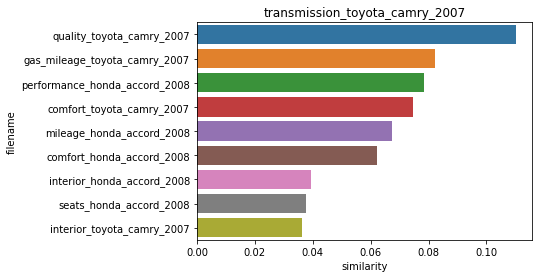

In [107]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[: , ::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

#유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity' , y='filename' , data=hotel_1_sim_df)
plt.title(comparison_docname)

## 8-9 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### 한글 NLP 처리의 어려움

### KoNLPy소개

## 8-10 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

In [2]:
/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/data_sets/mercari-price-suggestion-challenge

SyntaxError: ignored

### 데이터 전처리

In [3]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('train.tsv' , sep = '\t')
print(mercari_df.shape)
mercari_df.head(3)

FileNotFoundError: ignored

In [113]:
print(merari_df.info())

NameError: ignored

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

NameError: ignored

In [116]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

NameError: ignored

In [117]:
print('Shipping 값 유형:\n' , mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())

NameError: ignored

In [119]:
boolean_cond = mercari_df['item_descripton'] == 'No descripton yet'
mercari_df[boolean_cond]['item_descripton'].count()

NameError: ignored

In [120]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# 위의 split_cat( )을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성.
mercari_df['cat_dae'], mercari_df['cat_jung'] , mercari_df['cat_so'] = \
zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

#대분류만 값의 유형과 건수를 살펴보고 , 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형 :\n' , mercari_df['cat_dae'].value_counts( ) )
print('중분류 개수 :\n' , mercari_df['cat_jung'].nunique( ))
print('소분류 개수 :'   , mercari_df['cat_so'].nunique( ))

NameError: ignored